C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:51:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 SVM (RBF) Results:
Accuracy: 0.6053
F1 Score: 0.2857
Confusion Matrix:


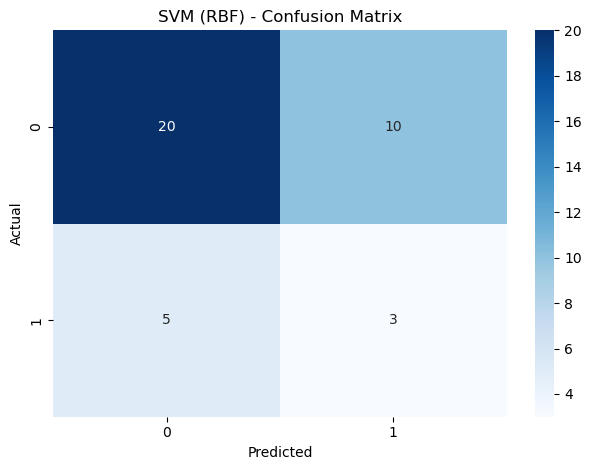


📊 Random Forest Results:
Accuracy: 0.7895
F1 Score: 0.0000
Confusion Matrix:


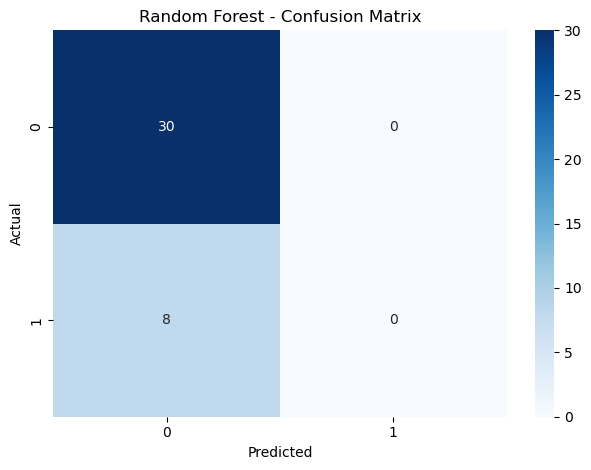


📊 XGBoost Results:
Accuracy: 0.8158
F1 Score: 0.2222
Confusion Matrix:


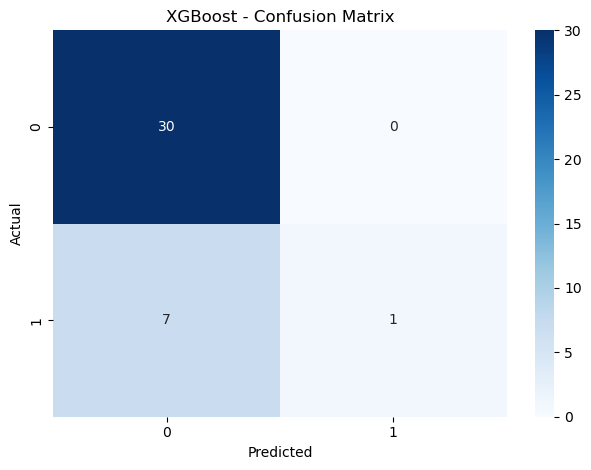


📋 Model Comparison Summary:
        Model  Accuracy  F1 Score
      XGBoost  0.815789  0.222222
Random Forest  0.789474  0.000000
    SVM (RBF)  0.605263  0.285714


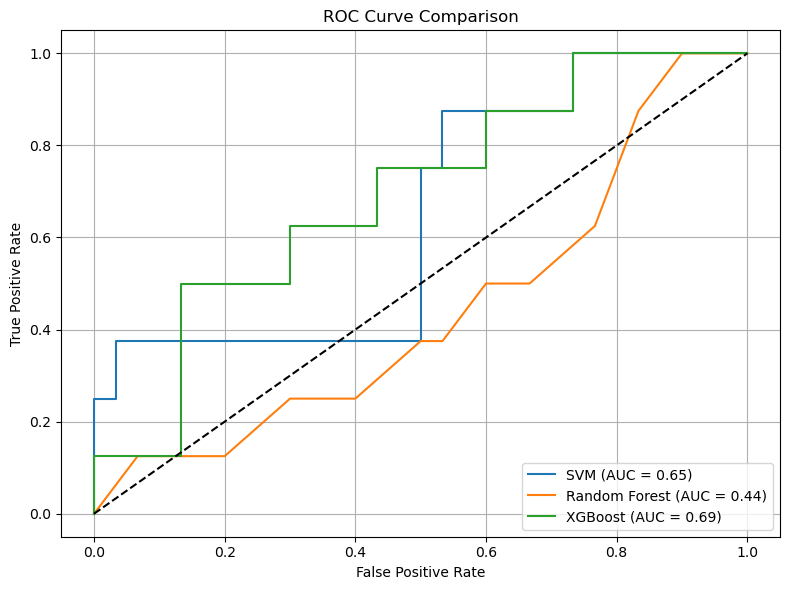

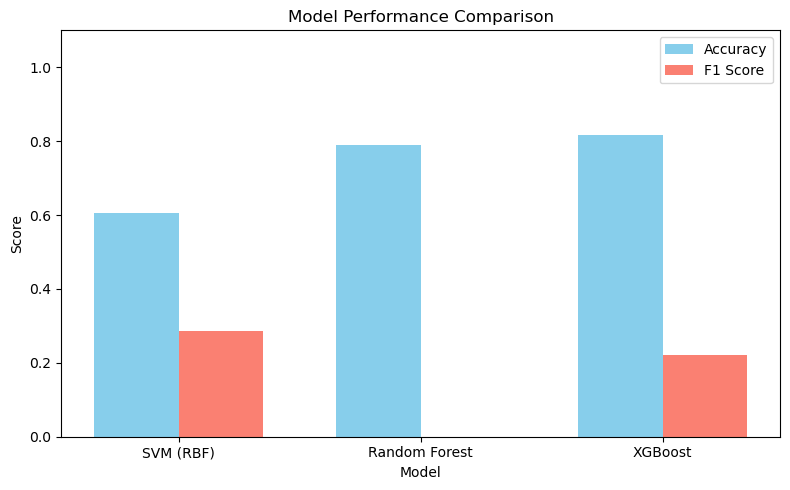

In [5]:
# Facial Recognition Pipeline with Random Forest, SVM, and XGBoost

# Step 1: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Dataset
df = pd.read_csv("lfw_arnie_nonarnie(1).csv")
X = df.drop(columns=["Label"]).values
y = df["Label"].values

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 4: Apply PCA (for SVM and XGBoost)
pca = PCA(n_components=50, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 5: Initialize Models
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Step 6: Train Models
svm_model.fit(X_train_pca, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train_pca, y_train)

# Step 7: Predictions
y_pred_svm = svm_model.predict(X_test_pca)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test_pca)

# Step 8: Evaluation Function
def evaluate(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n\U0001F4CA {name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Step 9: Evaluate All
evaluate("SVM (RBF)", y_test, y_pred_svm)
evaluate("Random Forest", y_test, y_pred_rf)
evaluate("XGBoost", y_test, y_pred_xgb)

# Step 10: Summary Table
results = pd.DataFrame({
    "Model": ["SVM (RBF)", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
})

print("\n\U0001F4CB Model Comparison Summary:")
print(results.sort_values(by="Accuracy", ascending=False).to_string(index=False))

# Step 11: ROC Curve Comparison
svm_probs = svm_model.predict_proba(X_test_pca)[:, 1]
rf_probs = rf_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test_pca)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc(fpr_svm, tpr_svm):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc(fpr_rf, tpr_rf):.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc(fpr_xgb, tpr_xgb):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 12: Bar Chart Comparison
plt.figure(figsize=(8, 5))
bar_width = 0.35
index = np.arange(len(results))
plt.bar(index, results["Accuracy"], bar_width, label="Accuracy", color="skyblue")
plt.bar(index + bar_width, results["F1 Score"], bar_width, label="F1 Score", color="salmon")

plt.xlabel("Model")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(index + bar_width / 2, results["Model"])
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()
